In [129]:
# 2020-01 CAU
# Natural Language Processing and Information Retrieval
# IR Evaluation
#
# Jihyo Han 20161856
#
#

import sys
import time
import random

import pandas as pd
from numpy import dot
from numpy.linalg import norm
import numpy as np

# for stop words
from nltk.corpus import stopwords 
import string

from matplotlib import pyplot as plt

In [2]:
stop_words = stopwords.words('english') + ['th', 'nd', 'i\'m', 'can\'t', 'i\'ve', '']
stop_marks = list(string.punctuation) + ['»','¿','»','â','€','œ','£','ã','¢','˜'] \
              + list(('0','1','2','3','4','5','6','7','8','9'))
print(stop_words, stop_marks)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [109]:
start = time.time()
# convert .xlsx file to list
data = pd.read_excel('./datasets/total_word_count.xlsx')
dictionary = data.values.tolist()      # list of total_word_counts w/ index
total_words = [row[0] for row in dictionary] # list of only vocabs
female_words = []
male_words = []

# making VSM of female/male documents
male_v = []
female_v = []
for word in range(len(dictionary)): # 2nd col meaning: female = 0, male = 1, both = 2
    if dictionary[word][1] == 0:
        female_words.append(dictionary[word][0])
        female_v.append(1)
        male_v.append(0)
    elif dictionary[word][1] == 1:
        male_words.append(dictionary[word][0])
        female_v.append(0)
        male_v.append(1)
    else:
        female_words.append(dictionary[word][0])
        male_words.append(dictionary[word][0])
        female_v.append(1)
        male_v.append(1)
        
print("-- Document Indexing Time (sec): ", time.time()-start)
print("Total number of vocabularies: %s \nFemale vocabularies count: %s \nMale vocabularies count: %s" 
      %(len(total_words), len(female_words), len(male_words)))

-- Document Indexing Time (sec):  3.8702003955841064
Total number of vocabularies: 50743 
Female vocabularies count: 34884 
Male vocabularies count: 35441


In [110]:
# -- 1. if wants to pop out random words from female or male words for query
def random_query(n):
    G = [female_words, male_words]
    G = random.choice(G)
    if G == female_words:
        return female_v, random.choices(G, k = n) # k: number of choices(words)
    else: return male_v, random.choices(G, k = n)
# -- 2. If wants to get query from user input, try below code
"""
print("\n ** If you want another one, please type it: ")
query = input().lower()
query = query.split() # split script by blank
"""

# for evaluating IR System  -------------------
MAP = 0
female_n = np.array(female_v)
male_n = np.array(male_v)

# calculating precision & recall
def PR_mean(G, Q):
    right = np.sum(G * Q == 1)
    precision = right/np.sum(Q)
    recall = right/np.sum(G)
    # if you want to calculate f-measure use this ↓
    # f1 = 2*precision*recall/(precision+recall)
    print('    precision: ', "{:.10f}".format(precision))
    print('    recall: ', "{:.10f}".format(recall))
    # print('    f1', "{:.10f}".format(f1))
    print('    Avg.: ', "{:.10f}".format((precision+recall)/2))
    return (precision+recall)/2
# ---------------------------------------------


In [142]:
query_v = [0 for i in range(len(dictionary))] #dictionary 크기의 쿼리 벡터 생성
query_counts = []
query_time   = []
map_avg = []


trial = 1000   # How many times do you want to try? 
count = 1000 # maximum words count to put in query

for i in range(trial):
    rand_len = random.randrange(count)
    gender, query = random_query(rand_len)
    print("[%s] Query words count:" %i, rand_len, "-", query[:5], "...")
    # ------- retrieval starts ----- #
    start = time.time()
    for token in query:
        if token in stop_words or token in stop_marks: continue #removing stopwords from query
        for word in range(len(dictionary)):
            if token == dictionary[word][0]:
                query_v[word] = 1
    total_time = time.time() - start
    print("    total time (sec): ", total_time)
    # ------- retrieval ends ------- #
    
    # calculating mean of precision & recall for MAP
    query_n = np.array(query_v)
    map_avg.append(PR_mean(gender, query_n))
    
    # for plotting graph of time used
    query_counts.append(rand_len)
    query_time.append(total_time)


[0] Query words count: 661 - ['inconceivable', 'copperhead', 'caesars', 'rheumatism', 'weaponless'] ...
    total time (sec):  8.54336667060852
    precision:  1.0000000000
    recall:  0.0188051829
    Avg.:  0.5094025914
[1] Query words count: 57 - ['cosmos', 'inevitably', 'punisher', 'wontill', 'hydrashock'] ...
    total time (sec):  0.6348507404327393
    precision:  0.6129032258
    recall:  0.0123303519
    Avg.:  0.3126167888
[2] Query words count: 615 - ['aaaaaaaaaaaagh', 'nawsir', 'sentient', 'crosslegged', 'recounted'] ...
    total time (sec):  8.729779243469238
    precision:  0.9748667174
    recall:  0.0366930398
    Avg.:  0.5057798786
[3] Query words count: 661 - ['guteman', 'fraternitys', 'hoves', 'frivolous', 'highbury'] ...
    total time (sec):  9.29672384262085
    precision:  0.9829984544
    recall:  0.0546955624
    Avg.:  0.5188470084
[4] Query words count: 263 - ['results', 'boundary', 'exceptional', 'exwifes', 'pause'] ...
    total time (sec):  3.9626674652

    total time (sec):  13.573889970779419
    precision:  0.8114539222
    recall:  0.3460612315
    Avg.:  0.5787575768
[39] Query words count: 677 - ['eastwood', 'mayfair', 'rachel', 'compeling', 'licked'] ...
    total time (sec):  8.733422756195068
    precision:  0.7332508627
    recall:  0.3177675573
    Avg.:  0.5255092100
[40] Query words count: 204 - ['moody', 'varens', 'yes', 'droids', 'orb'] ...
    total time (sec):  2.5426859855651855
    precision:  0.8019105402
    recall:  0.3561518175
    Avg.:  0.5790311788
[41] Query words count: 304 - ['closing', 'bambis', 'uncomfortably', 'nurses', 'wellfitted'] ...
    total time (sec):  3.528661012649536
    precision:  0.7345273759
    recall:  0.3251601253
    Avg.:  0.5298437506
[42] Query words count: 450 - ['undercharged', 'cruelty', 'downloads', 'holoemitter', 'set'] ...
    total time (sec):  5.346858024597168
    precision:  0.7399637885
    recall:  0.3344149431
    Avg.:  0.5371893658
[43] Query words count: 875 - ['thr

    total time (sec):  3.1117477416992188
    precision:  0.7793269430
    recall:  0.5383843596
    Avg.:  0.6588556513
[78] Query words count: 719 - ['destruction', 'asswipe', 'thieving', 'seeps', 'werent'] ...
    total time (sec):  11.305598020553589
    precision:  0.7820670437
    recall:  0.5470702901
    Avg.:  0.6645686669
[79] Query words count: 928 - ['sickly', 'divots', 'fravio', 'method', 'emyn'] ...
    total time (sec):  12.869654893875122
    precision:  0.7297014565
    recall:  0.5117237098
    Avg.:  0.6207125832
[80] Query words count: 885 - ['disembarks', 'punctual', 'tirith', 'fugitives', 'dries'] ...
    total time (sec):  11.687506437301636
    precision:  0.7342037587
    recall:  0.5236026071
    Avg.:  0.6289031829
[81] Query words count: 372 - ['spidery', 'accordians', 'sausage', 'laciviously', 'nightmares'] ...
    total time (sec):  4.970020771026611
    precision:  0.7361143845
    recall:  0.5287661183
    Avg.:  0.6324402514
[82] Query words count: 578 

    total time (sec):  6.775744199752808
    precision:  0.7347365867
    recall:  0.6944444444
    Avg.:  0.7145905156
[117] Query words count: 970 - ['twoshot', 'leash', 'gringo', 'perphenazine', 'philly'] ...
    total time (sec):  11.689322471618652
    precision:  0.7445356423
    recall:  0.6987387489
    Avg.:  0.7216371956
[118] Query words count: 163 - ['retrieves', 'saturday', 'steak', 'graded', 'chriss'] ...
    total time (sec):  2.0789291858673096
    precision:  0.7449267531
    recall:  0.7001777602
    Avg.:  0.7225522567
[119] Query words count: 746 - ['semen', 'imperfectly', 'anotherand', 'leavin', 'helmetcam'] ...
    total time (sec):  10.509622812271118
    precision:  0.7323116372
    recall:  0.7040763674
    Avg.:  0.7181940023
[120] Query words count: 40 - ['prow', 'jellybeans', 'nangi', 'landrover', 'bubbling'] ...
    total time (sec):  0.575087308883667
    precision:  0.7323994039
    recall:  0.7043916982
    Avg.:  0.7183955510
[121] Query words count: 91

    total time (sec):  6.605867624282837
    precision:  0.7349955332
    recall:  0.7782937736
    Avg.:  0.7566446534
[156] Query words count: 723 - ['bloodshed', 'boas', 'fullservice', 'payments', 'fascinating'] ...
    total time (sec):  10.107357501983643
    precision:  0.7361882175
    recall:  0.7830810687
    Avg.:  0.7596346431
[157] Query words count: 222 - ['gould', 'obstetrician', 'idontknowwhat', 'proceed', 'deconstruction'] ...
    total time (sec):  2.5795693397521973
    precision:  0.7364935799
    recall:  0.7843137255
    Avg.:  0.7604036527
[158] Query words count: 977 - ['cattle', 'keshia', 'teaming', 'boundaries', 'noun'] ...
    total time (sec):  11.83892560005188
    precision:  0.7379677713
    recall:  0.7903050109
    Avg.:  0.7641363911
[159] Query words count: 667 - ['lastly', 'possessions', 'energetically', 'housesitting', 'bookshelf'] ...
    total time (sec):  8.25495958328247
    precision:  0.7238069848
    recall:  0.7660619057
    Avg.:  0.74493444

    total time (sec):  0.979137659072876
    precision:  0.7280830640
    recall:  0.8523105148
    Avg.:  0.7901967894
[195] Query words count: 110 - ['designing', 'radio', 'sucking', 'okmeagainim', 'chilton'] ...
    total time (sec):  1.2936632633209229
    precision:  0.7177296980
    recall:  0.8274315059
    Avg.:  0.7725806019
[196] Query words count: 197 - ['misconceptions', 'frees', 'stocky', 'stubbornly', 'gut'] ...
    total time (sec):  2.3109912872314453
    precision:  0.7179850838
    recall:  0.8284754945
    Avg.:  0.7732302891
[197] Query words count: 750 - ['print', 'payers', 'courteous', 'curled', 'ballsy'] ...
    total time (sec):  8.474501848220825
    precision:  0.7189609377
    recall:  0.8324821534
    Avg.:  0.7757215456
[198] Query words count: 921 - ['sirens', 'scrub', 'blakes', 'fiddler', 'denvers'] ...
    total time (sec):  10.087867736816406
    precision:  0.7200048555
    recall:  0.8367991874
    Avg.:  0.7784020215
[199] Query words count: 421 - ['

    total time (sec):  8.783340692520142
    precision:  0.7169329808
    recall:  0.8939055154
    Avg.:  0.8054192481
[234] Query words count: 606 - ['marvins', 'bun', 'ninenine', 'compliment', 'paradoxes'] ...
    total time (sec):  7.863676071166992
    precision:  0.7154628291
    recall:  0.8795462882
    Avg.:  0.7975045586
[235] Query words count: 222 - ['traileralls', 'barrelvaulted', 'lameass', 'photographers', 'freed'] ...
    total time (sec):  2.6352171897888184
    precision:  0.7161111239
    recall:  0.8948515079
    Avg.:  0.8054813159
[236] Query words count: 971 - ['agrees', 'truce', 'uxt', 'selecting', 'overwrought'] ...
    total time (sec):  10.905595302581787
    precision:  0.7168386610
    recall:  0.8980621488
    Avg.:  0.8074504049
[237] Query words count: 361 - ['strapon', 'gained', 'guaranteed', 'bedbug', 'corporation'] ...
    total time (sec):  4.033147573471069
    precision:  0.7142791825
    recall:  0.8815778336
    Avg.:  0.7979285080
[238] Query wo

    total time (sec):  4.242822170257568
    precision:  0.7093617869
    recall:  0.9185873180
    Avg.:  0.8139745524
[273] Query words count: 547 - ['lace', 'tittering', 'slid', 'herthe', 'mascarasmudged'] ...
    total time (sec):  6.378144025802612
    precision:  0.7096446027
    recall:  0.9198486412
    Avg.:  0.8147466220
[274] Query words count: 530 - ['cerebral', 'freud', 'ruefully', 'cabin', 'closerhave'] ...
    total time (sec):  6.691218852996826
    precision:  0.7099973494
    recall:  0.9214252953
    Avg.:  0.8157113223
[275] Query words count: 398 - ['neutral', 'plunk', 'coloured', 'scene', 'sofa'] ...
    total time (sec):  4.803885221481323
    precision:  0.7103172852
    recall:  0.9228586171
    Avg.:  0.8165879512
[276] Query words count: 505 - ['company', 'bonappetit', 'horrid', 'applauds', 'weightlifters'] ...
    total time (sec):  5.362996339797974
    precision:  0.7105280564
    recall:  0.9238046096
    Avg.:  0.8171663330
[277] Query words count: 829 -

    total time (sec):  11.944558382034302
    precision:  0.7072270278
    recall:  0.9445304438
    Avg.:  0.8258787358
[312] Query words count: 520 - ['luckiest', 'bodyguards', 'heen', 'dthey', 'smothering'] ...
    total time (sec):  6.974649906158447
    precision:  0.7072914433
    recall:  0.9305888660
    Avg.:  0.8189401546
[313] Query words count: 698 - ['owlhoo', 'teleported', 'hovels', 'attributes', 'peekapoos'] ...
    total time (sec):  8.353073835372925
    precision:  0.7068518399
    recall:  0.9454477698
    Avg.:  0.8261498048
[314] Query words count: 265 - ['former', 'incoming', 'plywood', 'caskets', 'sorely'] ...
    total time (sec):  4.0842976570129395
    precision:  0.7070140109
    recall:  0.9311814001
    Avg.:  0.8190977055
[315] Query words count: 745 - ['resell', 'greenhaven', 'unspeakably', 'skirmish', 'dispenses'] ...
    total time (sec):  8.657840967178345
    precision:  0.7068230962
    recall:  0.9464224286
    Avg.:  0.8266227624
[316] Query words 

    total time (sec):  0.8962326049804688
    precision:  0.7051747665
    recall:  0.9478005700
    Avg.:  0.8264876682
[352] Query words count: 500 - ['cds', 'crackling', 'z', 'treasury', 'housewarming'] ...
    total time (sec):  6.54459023475647
    precision:  0.7024344176
    recall:  0.9594943240
    Avg.:  0.8309643708
[353] Query words count: 500 - ['dumbbells', 'schematic', 'timekeeper', 'paulette', 'eyewitness'] ...
    total time (sec):  9.571094036102295
    precision:  0.7051346589
    recall:  0.9485623995
    Avg.:  0.8268485292
[354] Query words count: 817 - ['planned', 'acapella', 'weeds', 'jacks', 'evergreens'] ...
    total time (sec):  9.271976947784424
    precision:  0.7023826987
    recall:  0.9608129802
    Avg.:  0.8315978394
[355] Query words count: 647 - ['yusuf', 'mark', 'relations', 'closeby', 'visitation'] ...
    total time (sec):  8.996748447418213
    precision:  0.7047724750
    recall:  0.9496063881
    Avg.:  0.8271894316
[356] Query words count: 84

    total time (sec):  10.892858505249023
    precision:  0.7032871972
    recall:  0.9634603990
    Avg.:  0.8333737981
[391] Query words count: 343 - ['premier', 'stagnant', 'wishes', 'sausages', 'indicator'] ...
    total time (sec):  5.215551376342773
    precision:  0.7033666221
    recall:  0.9638272058
    Avg.:  0.8335969139
[392] Query words count: 407 - ['fairi', 'chains', 'substances', 'intertwines', 'heimdall'] ...
    total time (sec):  6.02260422706604
    precision:  0.7034948339
    recall:  0.9644197398
    Avg.:  0.8339572869
[393] Query words count: 919 - ['backfires', 'yawning', 'freds', 'crunches', 'bedding'] ...
    total time (sec):  12.919977188110352
    precision:  0.7037631092
    recall:  0.9656612398
    Avg.:  0.8347121745
[394] Query words count: 853 - ['carday', 'insulin', 'denmark', 'uninvent', 'exits'] ...
    total time (sec):  11.539624691009521
    precision:  0.6972667489
    recall:  0.9726235523
    Avg.:  0.8349451506
[395] Query words count: 59

    total time (sec):  5.979013204574585
    precision:  0.7033103420
    recall:  0.9753392963
    Avg.:  0.8393248192
[430] Query words count: 818 - ['marin', 'zeroes', 'wallops', 'dirt', 'cowgirl'] ...
    total time (sec):  9.418805599212646
    precision:  0.7034189599
    recall:  0.9758471826
    Avg.:  0.8396330713
[431] Query words count: 171 - ['completing', 'evian', 'flammable', 'buzzsaw', 'lefts'] ...
    total time (sec):  1.9268498420715332
    precision:  0.7034310236
    recall:  0.9759036145
    Avg.:  0.8396673190
[432] Query words count: 391 - ['bringin', 'irving', 'humanly', 'bauxite', 'reticence'] ...
    total time (sec):  4.970695495605469
    precision:  0.6936638334
    recall:  0.9778981768
    Avg.:  0.8357810051
[433] Query words count: 394 - ['quasihyperbolic', 'feigning', 'poppoppoppoppop', 'jiujitsu', 'matrons'] ...
    total time (sec):  4.505983591079712
    precision:  0.7033626088
    recall:  0.9761857735
    Avg.:  0.8397741912
[434] Query words cou

    total time (sec):  6.379936933517456
    precision:  0.6930607137
    recall:  0.9843194588
    Avg.:  0.8386900862
[469] Query words count: 256 - ['distorts', 'savory', 'swore', 'retards', 'racking'] ...
    total time (sec):  3.8058218955993652
    precision:  0.7014874165
    recall:  0.9807285347
    Avg.:  0.8411079756
[470] Query words count: 456 - ['hatcheries', 'sebs', 'goodoldmrpalmgrendays', 'groups', 'stalked'] ...
    total time (sec):  6.243338584899902
    precision:  0.6930527250
    recall:  0.9846061232
    Avg.:  0.8388294241
[471] Query words count: 236 - ['reappraises', 'baraddur', 'candidates', 'neglecting', 'pronounce'] ...
    total time (sec):  3.2562918663024902
    precision:  0.7013579226
    recall:  0.9807849666
    Avg.:  0.8410714446
[472] Query words count: 920 - ['distributing', 'heiress', 'satchels', 'sketching', 'flexing'] ...
    total time (sec):  11.502237796783447
    precision:  0.6931176376
    recall:  0.9850361197
    Avg.:  0.8390768786
[

    total time (sec):  1.9308371543884277
    precision:  0.7011870569
    recall:  0.9850173528
    Avg.:  0.8431022048
[508] Query words count: 263 - ['cranelike', 'koe', 'prise', 'groundtill', 'hotu'] ...
    total time (sec):  3.286234140396118
    precision:  0.6916511016
    recall:  0.9872147689
    Avg.:  0.8394329353
[509] Query words count: 476 - ['active', 'eugenics', 'roment', 'falsetto', 'noment'] ...
    total time (sec):  7.723433017730713
    precision:  0.7011667370
    recall:  0.9851866482
    Avg.:  0.8431766926
[510] Query words count: 279 - ['bodyguards', 'india', 'moptopped', 'tragic', 'scarab'] ...
    total time (sec):  5.260968923568726
    precision:  0.6915739588
    recall:  0.9872434354
    Avg.:  0.8394086971
[511] Query words count: 7 - ['rochelles', 'closed', 'reviewed', 'quadrants', 'sooo'] ...
    total time (sec):  0.09378314018249512
    precision:  0.6915739588
    recall:  0.9872434354
    Avg.:  0.8394086971
[512] Query words count: 588 - ['kittr

    total time (sec):  4.644171953201294
    precision:  0.7006601320
    recall:  0.9882903981
    Avg.:  0.8444752651
[547] Query words count: 507 - ['reckon', 'flask', 'shipment', 'amandas', 'skimming'] ...
    total time (sec):  10.55435061454773
    precision:  0.7006900690
    recall:  0.9884314777
    Avg.:  0.8445607733
[548] Query words count: 664 - ['purposefully', 'educated', 'whumpf', 'encountered', 'flirtacious'] ...
    total time (sec):  9.144181251525879
    precision:  0.7007379557
    recall:  0.9886572049
    Avg.:  0.8446975803
[549] Query words count: 63 - ['pevensie', 'somewheres', 'frequent', 'speaks', 'harnesses'] ...
    total time (sec):  0.6752371788024902
    precision:  0.7007439405
    recall:  0.9886854208
    Avg.:  0.8447146807
[550] Query words count: 11 - ['knifehand', 'bloodhounds', 'darin', 'geological', 'dipping'] ...
    total time (sec):  0.12765884399414062
    precision:  0.7007439405
    recall:  0.9886854208
    Avg.:  0.8447146807
[551] Quer

    total time (sec):  9.33504319190979
    precision:  0.7005022522
    recall:  0.9917045230
    Avg.:  0.8461033876
[586] Query words count: 660 - ['copies', 'spinsterish', 'coldness', 'welcome', 'sinewy'] ...
    total time (sec):  8.883495569229126
    precision:  0.6896510492
    recall:  0.9920307304
    Avg.:  0.8408408898
[587] Query words count: 691 - ['twistsbut', 'dealy', 'domestic', 'toupee', 'bedrooms'] ...
    total time (sec):  8.975309610366821
    precision:  0.6896696026
    recall:  0.9921167297
    Avg.:  0.8408931662
[588] Query words count: 992 - ['whimpers', 'hqvukovichs', 'hearbroken', 'launched', 'accordion'] ...
    total time (sec):  13.199434041976929
    precision:  0.6897128853
    recall:  0.9923173948
    Avg.:  0.8410151400
[589] Query words count: 2 - ['fraulein', 'hulky'] ...
    total time (sec):  0.02496957778930664
    precision:  0.7002928929
    recall:  0.9917045230
    Avg.:  0.8459987079
[590] Query words count: 353 - ['preyand', 'communicati

    total time (sec):  8.795907020568848
    precision:  0.7002086438
    recall:  0.9942721706
    Avg.:  0.8472404072
[625] Query words count: 472 - ['midconversation', 'descriptions', 'thong', 'relentlessly', 'exhaled'] ...
    total time (sec):  6.107318162918091
    precision:  0.7002146008
    recall:  0.9943003866
    Avg.:  0.8472574937
[626] Query words count: 326 - ['standards', 'exceedingly', 'arizona', 'christmas', 'miram'] ...
    total time (sec):  4.129612445831299
    precision:  0.6887679072
    recall:  0.9937220502
    Avg.:  0.8412449787
[627] Query words count: 494 - ['disavowed', 'pendulum', 'woken', 'safetyglass', 'neutrl'] ...
    total time (sec):  6.210346698760986
    precision:  0.7001847768
    recall:  0.9943568184
    Avg.:  0.8472707976
[628] Query words count: 83 - ['bonsoir', 'fifield', 'manyou', 'toiling', 'ransack'] ...
    total time (sec):  1.0686888694763184
    precision:  0.6887467218
    recall:  0.9937507167
    Avg.:  0.8412487192
[629] Query

    total time (sec):  3.130970001220703
    precision:  0.6999186879
    recall:  0.9957958297
    Avg.:  0.8478572588
[664] Query words count: 126 - ['glumly', 'payers', 'shown', 'wonder', 'suntanned'] ...
    total time (sec):  1.792419672012329
    precision:  0.6999186879
    recall:  0.9957958297
    Avg.:  0.8478572588
[665] Query words count: 813 - ['staysput', 'eels', 'discern', 'citizen', 'picnic'] ...
    total time (sec):  10.798667192459106
    precision:  0.6999424911
    recall:  0.9959086933
    Avg.:  0.8479255922
[666] Query words count: 874 - ['minion', 'drug', 'politely', 'vaporized', 'inching'] ...
    total time (sec):  11.345279216766357
    precision:  0.6883402736
    recall:  0.9950980392
    Avg.:  0.8417191564
[667] Query words count: 542 - ['damiaitl', 'monty', 'dampness', 'tellingly', 'bioelectric'] ...
    total time (sec):  8.418859004974365
    precision:  0.6883464536
    recall:  0.9951267057
    Avg.:  0.8417365796
[668] Query words count: 404 - ['cu

    total time (sec):  6.303179979324341
    precision:  0.6995404667
    recall:  0.9965012274
    Avg.:  0.8480208470
[703] Query words count: 592 - ['ripper', 'halffilled', 'branches', 'detached', 'crewman'] ...
    total time (sec):  7.550807237625122
    precision:  0.6995464179
    recall:  0.9965294433
    Avg.:  0.8480379306
[704] Query words count: 318 - ['emails', 'enclosing', 'hyperventilates', 'borderline', 'feigning'] ...
    total time (sec):  4.965718746185303
    precision:  0.6883145177
    recall:  0.9962446967
    Avg.:  0.8422796072
[705] Query words count: 612 - ['maggie', 'gargles', 'grilling', 'uprights', 'systematically'] ...
    total time (sec):  7.848037004470825
    precision:  0.6883206908
    recall:  0.9962733631
    Avg.:  0.8422970270
[706] Query words count: 95 - ['launches', 'byebye', 'corry', 'nineteen', 'feet'] ...
    total time (sec):  1.4431426525115967
    precision:  0.6883206908
    recall:  0.9962733631
    Avg.:  0.8422970270
[707] Query wor

    total time (sec):  10.284531116485596
    precision:  0.6992662619
    recall:  0.9976298637
    Avg.:  0.8484480628
[742] Query words count: 97 - ['toenails', 'cigars', 'binaca', 'chokehold', 'acura'] ...
    total time (sec):  1.0571932792663574
    precision:  0.6880129739
    recall:  0.9972480220
    Avg.:  0.8426304980
[743] Query words count: 936 - ['eternity', 'foils', 'hanssomething', 'ottoman', 'drugged'] ...
    total time (sec):  13.10295581817627
    precision:  0.6880253140
    recall:  0.9973053549
    Avg.:  0.8426653344
[744] Query words count: 434 - ['hills', 'decide', 'find', 'begbottomed', 'togather'] ...
    total time (sec):  6.498652935028076
    precision:  0.6992564468
    recall:  0.9977145114
    Avg.:  0.8484854791
[745] Query words count: 832 - ['ringed', 'mau', 'sprig', 'associations', 'dabblin'] ...
    total time (sec):  11.896210193634033
    precision:  0.6992742876
    recall:  0.9977991592
    Avg.:  0.8485367234
[746] Query words count: 920 - ['

    total time (sec):  9.65318250656128
    precision:  0.6990260574
    recall:  0.9983916932
    Avg.:  0.8487088753
[781] Query words count: 301 - ['disadvantage', 'headboard', 'tracers', 'begging', 'limbering'] ...
    total time (sec):  4.7104387283325195
    precision:  0.6990260574
    recall:  0.9983916932
    Avg.:  0.8487088753
[782] Query words count: 59 - ['ayer', 'filmy', 'slog', 'confederate', 'sleeps'] ...
    total time (sec):  0.6343426704406738
    precision:  0.6990260574
    recall:  0.9983916932
    Avg.:  0.8487088753
[783] Query words count: 222 - ['shades', 'tele', 'quickest', 'proceedings', 'lanes'] ...
    total time (sec):  2.844419002532959
    precision:  0.6878247298
    recall:  0.9980793487
    Avg.:  0.8429520393
[784] Query words count: 265 - ['sons', 'smoking', 'entertained', 'swimming', 'limousines'] ...
    total time (sec):  3.4358127117156982
    precision:  0.6878247298
    recall:  0.9980793487
    Avg.:  0.8429520393
[785] Query words count: 84

    total time (sec):  3.9793553352355957
    precision:  0.6878381046
    recall:  0.9987100103
    Avg.:  0.8432740575
[820] Query words count: 213 - ['gary', 'zips', 'gamely', 'interpret', 'bek'] ...
    total time (sec):  2.434513568878174
    precision:  0.6878381046
    recall:  0.9987100103
    Avg.:  0.8432740575
[821] Query words count: 65 - ['gratitiude', 'weirded', 'splendid', 'detected', 'jolson'] ...
    total time (sec):  0.7250614166259766
    precision:  0.6987759131
    recall:  0.9986456364
    Avg.:  0.8487107748
[822] Query words count: 554 - ['cookie', 'lightspeed', 'handbag', 'engaged', 'grotto'] ...
    total time (sec):  6.133627414703369
    precision:  0.6878442676
    recall:  0.9987386768
    Avg.:  0.8432914722
[823] Query words count: 213 - ['contain', 'realm\x9d', 'kitchens', 'stint', 'federal'] ...
    total time (sec):  2.517306089401245
    precision:  0.6987621172
    recall:  0.9986456364
    Avg.:  0.8487038768
[824] Query words count: 476 - ['cyclo

    total time (sec):  10.499916315078735
    precision:  0.6877170824
    recall:  0.9989680083
    Avg.:  0.8433425453
[859] Query words count: 676 - ['wedges', 'sob', 'bureaucrat', 'developer', 'overturn'] ...
    total time (sec):  7.603664398193359
    precision:  0.6877170824
    recall:  0.9989680083
    Avg.:  0.8433425453
[860] Query words count: 213 - ['shew', 'tiptoe', 'kremlin', 'patio', 'practice'] ...
    total time (sec):  2.4344840049743652
    precision:  0.6987290811
    recall:  0.9990124432
    Avg.:  0.8488707622
[861] Query words count: 351 - ['tending', 'oc', 'choral', 'misery', 'amazing'] ...
    total time (sec):  4.938791751861572
    precision:  0.6877170824
    recall:  0.9989680083
    Avg.:  0.8433425453
[862] Query words count: 867 - ['reluctance', 'toronto', 'mcneill', 'allies', 'photography'] ...
    total time (sec):  10.086060762405396
    precision:  0.6987409717
    recall:  0.9990688750
    Avg.:  0.8489049234
[863] Query words count: 750 - ['bayon

    total time (sec):  5.830450773239136
    precision:  0.6876232936
    recall:  0.9992260062
    Avg.:  0.8434246499
[898] Query words count: 147 - ['eyelid', 'puffs', 'six', 'tlingit', 'eye'] ...
    total time (sec):  2.420527696609497
    precision:  0.6876232936
    recall:  0.9992260062
    Avg.:  0.8434246499
[899] Query words count: 14 - ['hothouse', 'cuffs', 'selves', 'sandbags', 'sincerely'] ...
    total time (sec):  0.16455864906311035
    precision:  0.6876232936
    recall:  0.9992260062
    Avg.:  0.8434246499
[900] Query words count: 656 - ['guzzling', 'deviation', 'mischievously', 'hairdo', 'pergolas'] ...
    total time (sec):  8.094348907470703
    precision:  0.6986763458
    recall:  0.9993510341
    Avg.:  0.8490136900
[901] Query words count: 116 - ['ship', 'spouting', 'stange', 'stanll', 'evacked'] ...
    total time (sec):  1.4620909690856934
    precision:  0.6876097292
    recall:  0.9992260062
    Avg.:  0.8434178677
[902] Query words count: 945 - ['smelt'

    total time (sec):  10.870885133743286
    precision:  0.6986390533
    recall:  0.9994356818
    Avg.:  0.8490373675
[938] Query words count: 907 - ['jessicas', 'oiled', 'oz', 'theme', 'sheen'] ...
    total time (sec):  10.419175386428833
    precision:  0.6986390533
    recall:  0.9994356818
    Avg.:  0.8490373675
[939] Query words count: 693 - ['maniacal', 'skinning', 'reality', 'somber', 'boots'] ...
    total time (sec):  7.684480428695679
    precision:  0.6875936884
    recall:  0.9993406719
    Avg.:  0.8434671802
[940] Query words count: 904 - ['tunes', 'label', 'motorcycle', 'nastyass', 'girland'] ...
    total time (sec):  10.901844263076782
    precision:  0.6875998501
    recall:  0.9993693384
    Avg.:  0.8434845942
[941] Query words count: 13 - ['irreversible', 'googles', 'winnetou', 'googley', 'masonry'] ...
    total time (sec):  0.14165759086608887
    precision:  0.6875998501
    recall:  0.9993693384
    Avg.:  0.8434845942
[942] Query words count: 814 - ['tree

    total time (sec):  9.711005449295044
    precision:  0.6986433726
    recall:  0.9997178409
    Avg.:  0.8491806068
[977] Query words count: 601 - ['hardtodislike', 'trong', 'manager', 'strategies', 'lugging'] ...
    total time (sec):  7.911881446838379
    precision:  0.6986433726
    recall:  0.9997178409
    Avg.:  0.8491806068
[978] Query words count: 76 - ['humiliated', 'iniciate', 'improvising', 'sigh', 'thorax'] ...
    total time (sec):  0.8457725048065186
    precision:  0.6986433726
    recall:  0.9997178409
    Avg.:  0.8491806068
[979] Query words count: 528 - ['jal', 'nocks', 'manacle', 'mashed', 'slag'] ...
    total time (sec):  6.086716413497925
    precision:  0.6986433726
    recall:  0.9997178409
    Avg.:  0.8491806068
[980] Query words count: 970 - ['tout', 'trinians', 'travel', 'toad', 'drivethru'] ...
    total time (sec):  14.244860649108887
    precision:  0.6986493148
    recall:  0.9997460568
    Avg.:  0.8491976858
[981] Query words count: 723 - ['recal

Trial number of query:  1000
Max. query length:  1000
Avg. query length:  486.882
Longest query length:  998
Shortest query length:  2


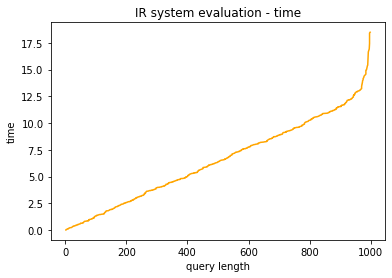

Avg. time:  6.309196942806244
Highest time:  18.486061334609985
Lowest time:  0.023935794830322266


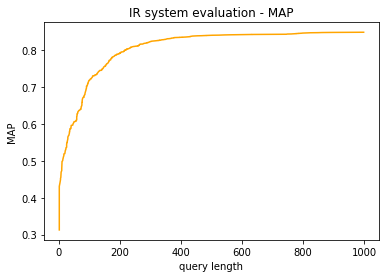

Avg. MAP:  0.8016424390028066
Highest MAP:  0.8492147647293422
Lowest MAP:  0.312616788829413


In [150]:
# -- plotting graphs

print("Trial number of query: ", trial)
print("Max. query length: ", count)
print("Avg. query length: ", sum(query_counts)/len(query_counts))
print("Longest query length: ", max(query_counts))
print("Shortest query length: ", min(query_counts))

query_counts.sort()
query_time.sort()
plt.plot(query_counts, query_time, 'orange')
plt.title('IR system evaluation - time')
plt.xlabel('query length')
plt.ylabel('time')
plt.show()
print("Avg. time: ", sum(query_time)/len(query_time))
print("Highest time: ", max(query_time))
print("Lowest time: ", min(query_time))

map_avg.sort()
plt.plot(query_counts, map_avg, 'orange')
plt.title('IR system evaluation - MAP')
plt.xlabel('query length')
plt.ylabel('MAP')
plt.show()

MAP = sum(map_avg)/trial
print("Avg. MAP: ", MAP)
print("Highest MAP: ", max(map_avg))
print("Lowest MAP: ", min(map_avg))